In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
datam = np.genfromtxt('IE440Final23ETSPData.txt', delimiter=',', dtype=None, encoding=None, names=True)

# Extract numeric data for x and y coordinates
x_column = datam['x']
y_column = datam['y']

# Merge the coordinates again
data = np.column_stack((x_column, y_column))

In [102]:
def train_som_gaussian(M, data, lr_initial, sigma_initial):
    np.random.seed(M * 15) 

    # Randomly locate M neurons
    if M > len(data):
        neurons = data[np.random.choice(len(data), M, replace=True)]
    else:
        neurons = data[np.random.choice(len(data), M, replace=False)]
        
    lr = lr_initial
    sigma = sigma_initial
    flag = True

    # Normalize data (cities' locations)
    data_normalized = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
    
    while flag:
        # Shuffle the data (cities' locations) for each iteration
        np.random.shuffle(data_normalized)  

        # For each city,
        for sample in data_normalized:      
            
            # Calculate distance between neurons and cities
            distances = neurons - sample        
            euclideans = [np.linalg.norm(i) for i in distances]

            winner = float('inf')
            winner_index = None

            # Find the index of the winner neuron
            for i in range(len(euclideans)):
                if euclideans[i] < winner:
                    winner = euclideans[i]
                    winner_index = i

            # Update weights for all neurons
            for i in range(M):
                k = np.exp(-(np.linalg.norm(neurons[i]-neurons[winner_index]))**2 / 2*sigma**2)
                neurons[i] += lr * k * (sample - neurons[i])

        # Update the learning rate and sigma
        lr *= 0.95
        sigma *= 0.95

        # Stopping condition
        if lr < 0.00005:
            flag=False
    
    return neurons


In [103]:
def train_som_elastic_band(M, data, lr_initial, sigma_initial):
    np.random.seed(M * 15)  

    # Randomly locate M neurons
    if M > len(data):
        neurons = data[np.random.choice(len(data), M, replace=True)]
    else:
        neurons = data[np.random.choice(len(data), M, replace=False)]

    lr = lr_initial
    sigma = sigma_initial
    flag = True


    # Normalize data (cities' locations)
    data_normalized = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
    
    while flag:

        # Shuffle the data (cities' locations) for each iteration
        np.random.shuffle(data_normalized) 
        
        # For each city,
        for sample in data_normalized:
            
            # Calculate distance between neurons and cities
            distances = neurons - sample

            euclideans = [np.linalg.norm(i) for i in distances]

            winner = float('inf')
            winner_index = None

            for i in range(len(euclideans)):
                if euclideans[i] < winner:
                    winner = euclideans[i]
                    winner_index = i
            
            # Update weights for all neurons
            for i in range(M):
                distance_to_bmu = min(np.abs(i - winner_index), M - np.abs(i - winner_index))
                k = np.exp(-distance_to_bmu**2 / sigma**2)
                neurons[i] += lr * k * (sample - neurons[i])

        # Update the learning rate and sigma
        lr *= 0.95
        sigma *= 0.95

        # Stopping condition
        if lr < 0.001:
            flag=False
    
    return neurons


In [104]:
def visualize_tour(neurons, data):

    data_normalized = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
    order = np.argsort([np.argmin(np.linalg.norm(neurons - d, axis=1)) for d in data])
    
    plt.scatter(data_normalized[:, 0], data_normalized[:, 1], label='Cities')
    plt.plot(data_normalized[order][:, 0], data_normalized[order][:, 1], c='r', label='Tour')
    plt.title('SOM Tour')
    plt.legend()
    plt.show()

    return data_normalized[order]

In [105]:
def calculate_tour_cost(cities):
    
    distance = 0
    for i in range(len(cities)-1):
        traveled = cities[i+1] - cities[i]
        distance += np.linalg.norm(traveled)

    data_normalized = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

    cities_order = []
    for i in range(len(cities)):
        for j in range(len(data_normalized)):
            if np.all(cities[i] == data_normalized[j]):
                cities_order.append(datam['City'][j])


    print("Cities Visited in Order:")

    print(cities_order)

    return distance



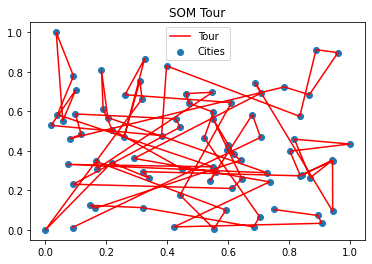

Cities Visited in Order:
['Nevsehir', 'Bursa', 'Yalova', 'Diyarbakir', 'Isparta', 'Erzincan', 'Gaziantep', 'Kilis', 'Kastamonu', 'Cankiri', 'Denizli', 'Yozgat', 'Eskisehir', 'Amasya', 'Samsun', 'Sinop', 'Corum', 'Hatay', 'Adana', 'Sanliurfa', 'Zonguldak', 'Kars', 'Kirklareli', 'Edirne', 'Tekirdag', 'Ardahan', 'Osmaniye', 'Tokat', 'Mersin', 'Bolu', 'Gumushane', 'Nigde', 'Kutahya', 'Batman', 'Antalya', 'Mardin', 'Burdur', 'Bilecik', 'Erzurum', 'Aksaray', 'Kirsehir', 'Malatya', 'Usak', 'Mus', 'Bayburt', 'Sakarya', 'Duzce', 'Trabzon', 'Rize', 'Sivas', 'Kahramanmaras', 'Bingol', 'Afyonkarahisar', 'Tunceli', 'Kocaeli', 'Ordu', 'Bartin', 'Karaman', 'Karabuk', 'Giresun', 'Kayseri', 'Kirikkale', 'Konya', 'Adiyaman', 'Agri', 'Sirnak', 'Canakkale', 'Mugla', 'Aydin', 'Igdir', 'Balikesir', 'Hakkari', 'Izmir', 'Artvin', 'Istanbul', 'Ankara', 'Siirt', 'Elazig', 'Manisa', 'Van', 'Bitlis']
Cost for M=81: 21.82


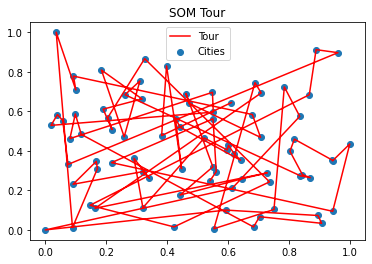

Cities Visited in Order:
['Kocaeli', 'Sanliurfa', 'Zonguldak', 'Erzincan', 'Bolu', 'Gumushane', 'Erzurum', 'Burdur', 'Mardin', 'Bilecik', 'Bayburt', 'Malatya', 'Ankara', 'Konya', 'Adiyaman', 'Nigde', 'Kahramanmaras', 'Sivas', 'Nevsehir', 'Sinop', 'Hatay', 'Samsun', 'Yalova', 'Bursa', 'Duzce', 'Trabzon', 'Eskisehir', 'Tunceli', 'Batman', 'Denizli', 'Aksaray', 'Istanbul', 'Artvin', 'Afyonkarahisar', 'Bitlis', 'Ardahan', 'Kars', 'Kutahya', 'Kayseri', 'Bingol', 'Van', 'Manisa', 'Mus', 'Usak', 'Tokat', 'Mersin', 'Osmaniye', 'Rize', 'Sakarya', 'Adana', 'Amasya', 'Corum', 'Yozgat', 'Edirne', 'Kirklareli', 'Tekirdag', 'Kirsehir', 'Elazig', 'Siirt', 'Bartin', 'Cankiri', 'Gaziantep', 'Kilis', 'Giresun', 'Kastamonu', 'Karaman', 'Karabuk', 'Ordu', 'Agri', 'Aydin', 'Balikesir', 'Sirnak', 'Mugla', 'Igdir', 'Hakkari', 'Canakkale', 'Izmir', 'Kirikkale', 'Antalya', 'Isparta', 'Diyarbakir']
Cost for M=162: 22.99


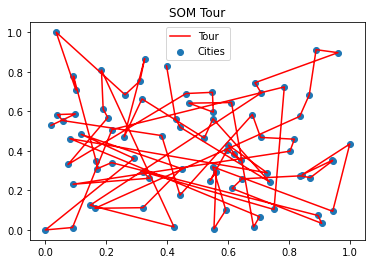

Cities Visited in Order:
['Adana', 'Mersin', 'Amasya', 'Corum', 'Sanliurfa', 'Tunceli', 'Yalova', 'Bursa', 'Mugla', 'Sirnak', 'Nigde', 'Konya', 'Adiyaman', 'Bitlis', 'Ardahan', 'Gaziantep', 'Nevsehir', 'Kayseri', 'Ankara', 'Tokat', 'Erzincan', 'Malatya', 'Aksaray', 'Kars', 'Tekirdag', 'Kirklareli', 'Edirne', 'Artvin', 'Istanbul', 'Kirsehir', 'Elazig', 'Kastamonu', 'Kilis', 'Cankiri', 'Yozgat', 'Trabzon', 'Rize', 'Sakarya', 'Duzce', 'Kocaeli', 'Usak', 'Mus', 'Osmaniye', 'Denizli', 'Mardin', 'Burdur', 'Erzurum', 'Bilecik', 'Diyarbakir', 'Isparta', 'Afyonkarahisar', 'Bingol', 'Eskisehir', 'Izmir', 'Canakkale', 'Balikesir', 'Igdir', 'Hakkari', 'Aydin', 'Agri', 'Batman', 'Kutahya', 'Manisa', 'Van', 'Kirikkale', 'Sivas', 'Kahramanmaras', 'Samsun', 'Hatay', 'Sinop', 'Ordu', 'Karabuk', 'Bartin', 'Karaman', 'Giresun', 'Bayburt', 'Antalya', 'Siirt', 'Gumushane', 'Bolu', 'Zonguldak']
Cost for M=243: 20.83


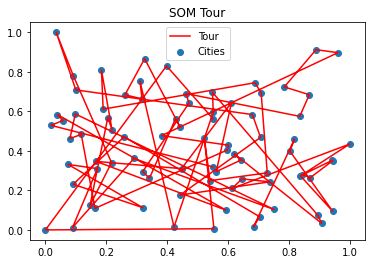

Cities Visited in Order:
['Eskisehir', 'Adana', 'Corum', 'Amasya', 'Bingol', 'Kahramanmaras', 'Erzincan', 'Kocaeli', 'Isparta', 'Erzurum', 'Burdur', 'Manisa', 'Van', 'Rize', 'Sakarya', 'Elazig', 'Karabuk', 'Giresun', 'Ordu', 'Bartin', 'Gumushane', 'Bolu', 'Konya', 'Adiyaman', 'Duzce', 'Trabzon', 'Kars', 'Tekirdag', 'Ardahan', 'Kirklareli', 'Edirne', 'Sanliurfa', 'Mardin', 'Bilecik', 'Aksaray', 'Tokat', 'Osmaniye', 'Mersin', 'Bitlis', 'Ankara', 'Nevsehir', 'Sivas', 'Yozgat', 'Malatya', 'Nigde', 'Karaman', 'Mus', 'Usak', 'Mugla', 'Sirnak', 'Izmir', 'Agri', 'Igdir', 'Hakkari', 'Aydin', 'Balikesir', 'Canakkale', 'Kutahya', 'Batman', 'Siirt', 'Tunceli', 'Bursa', 'Yalova', 'Hatay', 'Sinop', 'Samsun', 'Kirikkale', 'Kirsehir', 'Cankiri', 'Gaziantep', 'Kastamonu', 'Kilis', 'Artvin', 'Istanbul', 'Denizli', 'Diyarbakir', 'Bayburt', 'Afyonkarahisar', 'Kayseri', 'Zonguldak', 'Antalya']
Cost for M=405: 23.24


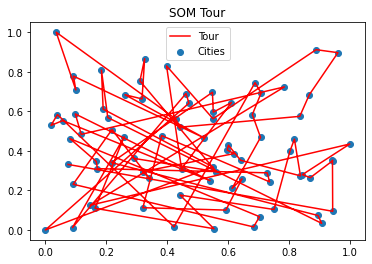

Cities Visited in Order:
['Yozgat', 'Izmir', 'Igdir', 'Hakkari', 'Aydin', 'Balikesir', 'Canakkale', 'Kirsehir', 'Ardahan', 'Tokat', 'Mersin', 'Diyarbakir', 'Corum', 'Adana', 'Amasya', 'Elazig', 'Artvin', 'Istanbul', 'Yalova', 'Bursa', 'Kutahya', 'Batman', 'Bingol', 'Malatya', 'Sanliurfa', 'Siirt', 'Denizli', 'Sivas', 'Kahramanmaras', 'Osmaniye', 'Mus', 'Usak', 'Nigde', 'Gaziantep', 'Konya', 'Adiyaman', 'Burdur', 'Bilecik', 'Mardin', 'Erzurum', 'Agri', 'Mugla', 'Sirnak', 'Bitlis', 'Tunceli', 'Afyonkarahisar', 'Aksaray', 'Karaman', 'Nevsehir', 'Trabzon', 'Duzce', 'Kayseri', 'Eskisehir', 'Kilis', 'Kastamonu', 'Cankiri', 'Manisa', 'Van', 'Kirikkale', 'Rize', 'Sakarya', 'Kocaeli', 'Erzincan', 'Zonguldak', 'Antalya', 'Kirklareli', 'Edirne', 'Tekirdag', 'Kars', 'Gumushane', 'Bolu', 'Sinop', 'Hatay', 'Samsun', 'Bayburt', 'Ordu', 'Giresun', 'Bartin', 'Karabuk', 'Isparta', 'Ankara']
Cost for M=567: 25.54


In [106]:
n = len(x_column)
M_values = [n, 2*n, 3*n, 5*81, 7*n]

for M in M_values:
    # Train SOM with Gaussian neighborhood initially, then switch to elastic band
    neurons = train_som_gaussian(M, data, lr_initial=0.1, sigma_initial=1)
    
    # Visualize the tour
    result = visualize_tour(neurons, data)

    # Calculate and print the cost of the tour
    tour_cost = calculate_tour_cost(result)
    print(f'Cost for M={M}: {tour_cost:.2f}')


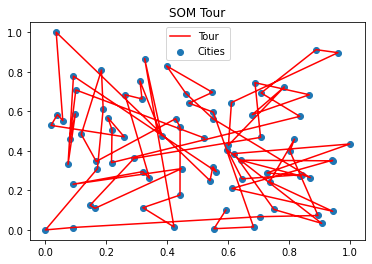

Cities Visited in Order:
['Bayburt', 'Hatay', 'Osmaniye', 'Mersin', 'Yozgat', 'Samsun', 'Isparta', 'Eskisehir', 'Diyarbakir', 'Sinop', 'Corum', 'Amasya', 'Adana', 'Karaman', 'Cankiri', 'Gaziantep', 'Kirikkale', 'Kars', 'Istanbul', 'Kirklareli', 'Edirne', 'Kocaeli', 'Mardin', 'Ardahan', 'Yalova', 'Tekirdag', 'Artvin', 'Bursa', 'Ankara', 'Kirsehir', 'Aksaray', 'Erzincan', 'Nigde', 'Adiyaman', 'Konya', 'Ordu', 'Giresun', 'Karabuk', 'Sanliurfa', 'Bartin', 'Elazig', 'Malatya', 'Tunceli', 'Gumushane', 'Bolu', 'Kahramanmaras', 'Tokat', 'Kastamonu', 'Kilis', 'Sivas', 'Kayseri', 'Nevsehir', 'Mus', 'Van', 'Sirnak', 'Mugla', 'Siirt', 'Izmir', 'Kutahya', 'Igdir', 'Hakkari', 'Erzurum', 'Agri', 'Denizli', 'Canakkale', 'Burdur', 'Bitlis', 'Manisa', 'Bilecik', 'Batman', 'Balikesir', 'Aydin', 'Antalya', 'Trabzon', 'Zonguldak', 'Rize', 'Duzce', 'Sakarya', 'Usak', 'Afyonkarahisar', 'Bingol']
Cost for M=81: 20.71


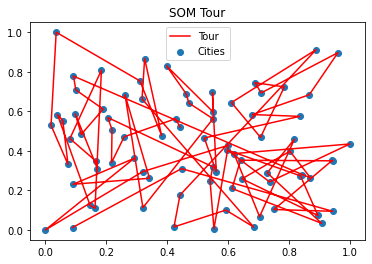

Cities Visited in Order:
['Gumushane', 'Bolu', 'Karaman', 'Kirikkale', 'Gaziantep', 'Cankiri', 'Eskisehir', 'Diyarbakir', 'Afyonkarahisar', 'Mardin', 'Adiyaman', 'Kayseri', 'Ankara', 'Nigde', 'Konya', 'Ordu', 'Malatya', 'Antalya', 'Duzce', 'Trabzon', 'Zonguldak', 'Sakarya', 'Rize', 'Isparta', 'Bayburt', 'Kars', 'Yalova', 'Tekirdag', 'Edirne', 'Istanbul', 'Artvin', 'Ardahan', 'Bursa', 'Kocaeli', 'Kirklareli', 'Tunceli', 'Elazig', 'Bingol', 'Usak', 'Giresun', 'Bartin', 'Sanliurfa', 'Karabuk', 'Sinop', 'Adana', 'Yozgat', 'Corum', 'Amasya', 'Kirsehir', 'Aksaray', 'Kastamonu', 'Osmaniye', 'Kahramanmaras', 'Sivas', 'Mersin', 'Tokat', 'Kilis', 'Hatay', 'Samsun', 'Balikesir', 'Aydin', 'Sirnak', 'Batman', 'Van', 'Agri', 'Bilecik', 'Siirt', 'Canakkale', 'Burdur', 'Mus', 'Mugla', 'Denizli', 'Manisa', 'Kutahya', 'Erzurum', 'Hakkari', 'Igdir', 'Bitlis', 'Izmir', 'Erzincan', 'Nevsehir']
Cost for M=162: 21.82


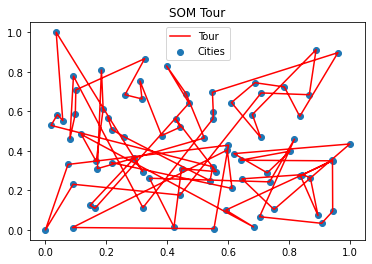

Cities Visited in Order:
['Kirikkale', 'Kutahya', 'Bilecik', 'Nevsehir', 'Afyonkarahisar', 'Mardin', 'Yozgat', 'Kayseri', 'Nigde', 'Tunceli', 'Istanbul', 'Tekirdag', 'Kirklareli', 'Yalova', 'Bursa', 'Kocaeli', 'Artvin', 'Ardahan', 'Kars', 'Edirne', 'Rize', 'Sakarya', 'Antalya', 'Malatya', 'Samsun', 'Osmaniye', 'Mersin', 'Hatay', 'Bartin', 'Ordu', 'Giresun', 'Karabuk', 'Sanliurfa', 'Gumushane', 'Bolu', 'Isparta', 'Erzincan', 'Elazig', 'Konya', 'Siirt', 'Mugla', 'Mus', 'Manisa', 'Izmir', 'Igdir', 'Agri', 'Van', 'Aydin', 'Balikesir', 'Batman', 'Bitlis', 'Canakkale', 'Burdur', 'Denizli', 'Sirnak', 'Erzurum', 'Hakkari', 'Bingol', 'Usak', 'Tokat', 'Kahramanmaras', 'Kilis', 'Kastamonu', 'Sivas', 'Bayburt', 'Trabzon', 'Zonguldak', 'Duzce', 'Aksaray', 'Kirsehir', 'Ankara', 'Adiyaman', 'Sinop', 'Corum', 'Amasya', 'Adana', 'Eskisehir', 'Diyarbakir', 'Karaman', 'Gaziantep', 'Cankiri']
Cost for M=243: 21.23


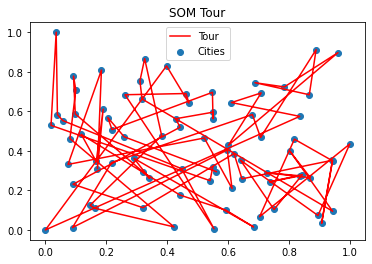

Cities Visited in Order:
['Eskisehir', 'Diyarbakir', 'Adana', 'Sinop', 'Amasya', 'Corum', 'Erzincan', 'Afyonkarahisar', 'Ordu', 'Trabzon', 'Duzce', 'Zonguldak', 'Kayseri', 'Kars', 'Kocaeli', 'Istanbul', 'Mardin', 'Edirne', 'Ardahan', 'Artvin', 'Tekirdag', 'Kirklareli', 'Bursa', 'Yalova', 'Kirikkale', 'Nevsehir', 'Bilecik', 'Kutahya', 'Bayburt', 'Yozgat', 'Kastamonu', 'Sivas', 'Kilis', 'Kahramanmaras', 'Tokat', 'Tunceli', 'Bingol', 'Usak', 'Ankara', 'Konya', 'Adiyaman', 'Mersin', 'Samsun', 'Hatay', 'Osmaniye', 'Elazig', 'Aksaray', 'Kirsehir', 'Sanliurfa', 'Bartin', 'Karabuk', 'Giresun', 'Izmir', 'Sirnak', 'Aydin', 'Denizli', 'Agri', 'Siirt', 'Balikesir', 'Bitlis', 'Erzurum', 'Van', 'Canakkale', 'Mus', 'Mugla', 'Hakkari', 'Manisa', 'Igdir', 'Batman', 'Burdur', 'Malatya', 'Nigde', 'Gumushane', 'Bolu', 'Sakarya', 'Antalya', 'Rize', 'Gaziantep', 'Cankiri', 'Karaman', 'Isparta']
Cost for M=405: 23.92


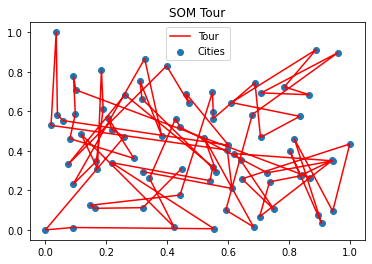

Cities Visited in Order:
['Adiyaman', 'Kutahya', 'Bilecik', 'Adana', 'Sinop', 'Amasya', 'Corum', 'Mardin', 'Trabzon', 'Duzce', 'Zonguldak', 'Yozgat', 'Ordu', 'Eskisehir', 'Diyarbakir', 'Kirikkale', 'Afyonkarahisar', 'Nevsehir', 'Kayseri', 'Karaman', 'Gaziantep', 'Cankiri', 'Ankara', 'Osmaniye', 'Mersin', 'Samsun', 'Hatay', 'Aydin', 'Balikesir', 'Igdir', 'Mus', 'Siirt', 'Agri', 'Sirnak', 'Van', 'Manisa', 'Mugla', 'Izmir', 'Canakkale', 'Batman', 'Bitlis', 'Erzurum', 'Burdur', 'Hakkari', 'Denizli', 'Gumushane', 'Bolu', 'Konya', 'Elazig', 'Tokat', 'Sivas', 'Kastamonu', 'Kilis', 'Kahramanmaras', 'Nigde', 'Bartin', 'Sanliurfa', 'Karabuk', 'Giresun', 'Isparta', 'Bayburt', 'Usak', 'Bingol', 'Yalova', 'Edirne', 'Istanbul', 'Tekirdag', 'Ardahan', 'Kirklareli', 'Kocaeli', 'Kars', 'Bursa', 'Artvin', 'Antalya', 'Sakarya', 'Rize', 'Tunceli', 'Kirsehir', 'Aksaray', 'Malatya', 'Erzincan']
Cost for M=567: 22.20


In [107]:
n = len(x_column)
M_values = [n, 2*n, 3*n, 5*81, 7*n]

for M in M_values:
    # Train SOM with Gaussian neighborhood initially, then switch to elastic band
    neurons = train_som_gaussian(M, data, lr_initial=0.3, sigma_initial=1.5)
    
    # Visualize the tour
    result = visualize_tour(neurons, data)

    # Calculate and print the cost of the tour
    tour_cost = calculate_tour_cost(result)
    print(f'Cost for M={M}: {tour_cost:.2f}')

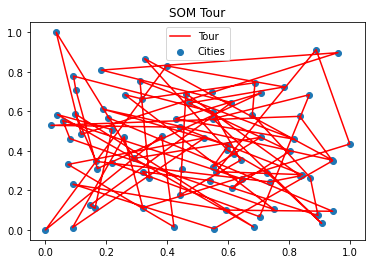

Cities Visited in Order:
['Kirikkale', 'Mus', 'Tekirdag', 'Antalya', 'Manisa', 'Denizli', 'Burdur', 'Bilecik', 'Bartin', 'Igdir', 'Kilis', 'Mardin', 'Eskisehir', 'Bursa', 'Ankara', 'Sinop', 'Tokat', 'Rize', 'Edirne', 'Kastamonu', 'Kocaeli', 'Kirsehir', 'Aksaray', 'Gaziantep', 'Amasya', 'Usak', 'Mersin', 'Kahramanmaras', 'Siirt', 'Agri', 'Trabzon', 'Erzincan', 'Tunceli', 'Erzurum', 'Sakarya', 'Samsun', 'Hatay', 'Sivas', 'Istanbul', 'Bolu', 'Mugla', 'Karabuk', 'Konya', 'Adiyaman', 'Diyarbakir', 'Van', 'Aydin', 'Yalova', 'Artvin', 'Giresun', 'Ordu', 'Bitlis', 'Osmaniye', 'Corum', 'Batman', 'Kutahya', 'Sirnak', 'Duzce', 'Ardahan', 'Zonguldak', 'Kayseri', 'Sanliurfa', 'Elazig', 'Yozgat', 'Bayburt', 'Nevsehir', 'Karaman', 'Malatya', 'Canakkale', 'Kirklareli', 'Isparta', 'Balikesir', 'Gumushane', 'Adana', 'Kars', 'Hakkari', 'Afyonkarahisar', 'Nigde', 'Bingol', 'Izmir', 'Cankiri']
Cost for M=81: 35.30


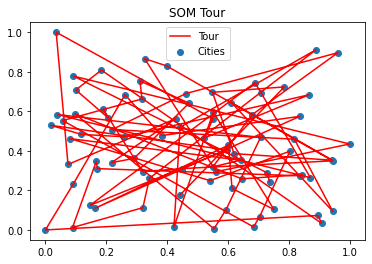

Cities Visited in Order:
['Tunceli', 'Ardahan', 'Rize', 'Burdur', 'Igdir', 'Kocaeli', 'Izmir', 'Mugla', 'Gaziantep', 'Trabzon', 'Edirne', 'Yalova', 'Eskisehir', 'Erzurum', 'Osmaniye', 'Diyarbakir', 'Sirnak', 'Mus', 'Usak', 'Corum', 'Giresun', 'Karabuk', 'Duzce', 'Ankara', 'Kirikkale', 'Bolu', 'Yozgat', 'Sinop', 'Antalya', 'Bayburt', 'Tekirdag', 'Karaman', 'Tokat', 'Adana', 'Bilecik', 'Kirsehir', 'Artvin', 'Istanbul', 'Aydin', 'Amasya', 'Bursa', 'Bingol', 'Afyonkarahisar', 'Mersin', 'Batman', 'Balikesir', 'Agri', 'Sivas', 'Kahramanmaras', 'Nevsehir', 'Malatya', 'Konya', 'Kirklareli', 'Gumushane', 'Elazig', 'Sakarya', 'Bitlis', 'Kutahya', 'Mardin', 'Aksaray', 'Kars', 'Sanliurfa', 'Ordu', 'Nigde', 'Kayseri', 'Van', 'Manisa', 'Kastamonu', 'Hatay', 'Cankiri', 'Kilis', 'Adiyaman', 'Erzincan', 'Hakkari', 'Zonguldak', 'Bartin', 'Isparta', 'Canakkale', 'Samsun', 'Denizli', 'Siirt']
Cost for M=162: 33.16


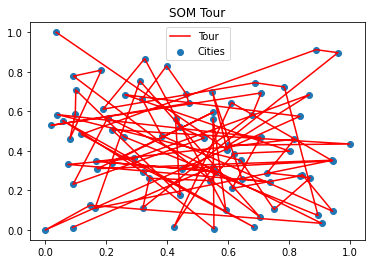

Cities Visited in Order:
['Sinop', 'Bilecik', 'Rize', 'Batman', 'Siirt', 'Yozgat', 'Ankara', 'Tekirdag', 'Mardin', 'Canakkale', 'Gaziantep', 'Tunceli', 'Bolu', 'Gumushane', 'Bayburt', 'Nigde', 'Cankiri', 'Manisa', 'Kirsehir', 'Kayseri', 'Kars', 'Ordu', 'Sirnak', 'Burdur', 'Diyarbakir', 'Konya', 'Malatya', 'Edirne', 'Kirklareli', 'Tokat', 'Usak', 'Corum', 'Adiyaman', 'Afyonkarahisar', 'Antalya', 'Bingol', 'Bartin', 'Kilis', 'Artvin', 'Ardahan', 'Van', 'Karaman', 'Hatay', 'Mersin', 'Osmaniye', 'Kastamonu', 'Samsun', 'Mus', 'Karabuk', 'Aksaray', 'Igdir', 'Sivas', 'Sakarya', 'Kirikkale', 'Isparta', 'Kahramanmaras', 'Mugla', 'Denizli', 'Aydin', 'Bitlis', 'Erzurum', 'Amasya', 'Bursa', 'Kutahya', 'Agri', 'Balikesir', 'Izmir', 'Sanliurfa', 'Giresun', 'Zonguldak', 'Trabzon', 'Duzce', 'Adana', 'Istanbul', 'Yalova', 'Erzincan', 'Hakkari', 'Kocaeli', 'Elazig', 'Eskisehir', 'Nevsehir']
Cost for M=243: 35.22


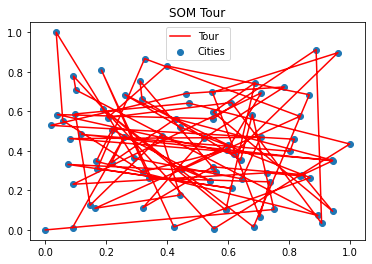

Cities Visited in Order:
['Nevsehir', 'Karaman', 'Kirikkale', 'Bolu', 'Igdir', 'Osmaniye', 'Bursa', 'Batman', 'Ankara', 'Sinop', 'Corum', 'Adiyaman', 'Bilecik', 'Istanbul', 'Nigde', 'Denizli', 'Agri', 'Hakkari', 'Tokat', 'Sirnak', 'Mugla', 'Adana', 'Trabzon', 'Ardahan', 'Bayburt', 'Malatya', 'Eskisehir', 'Balikesir', 'Izmir', 'Sakarya', 'Artvin', 'Bingol', 'Kilis', 'Usak', 'Tekirdag', 'Zonguldak', 'Cankiri', 'Kocaeli', 'Manisa', 'Kirklareli', 'Antalya', 'Amasya', 'Burdur', 'Edirne', 'Rize', 'Mus', 'Siirt', 'Konya', 'Kastamonu', 'Elazig', 'Aydin', 'Gumushane', 'Ordu', 'Mardin', 'Erzincan', 'Diyarbakir', 'Gaziantep', 'Kahramanmaras', 'Van', 'Hatay', 'Samsun', 'Afyonkarahisar', 'Canakkale', 'Duzce', 'Mersin', 'Kirsehir', 'Sanliurfa', 'Tunceli', 'Aksaray', 'Kars', 'Bartin', 'Sivas', 'Kutahya', 'Yozgat', 'Isparta', 'Karabuk', 'Giresun', 'Erzurum', 'Yalova', 'Bitlis', 'Kayseri']
Cost for M=405: 38.21


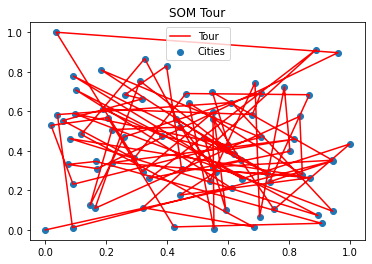

Cities Visited in Order:
['Gumushane', 'Gaziantep', 'Kirsehir', 'Karaman', 'Istanbul', 'Yalova', 'Kilis', 'Sanliurfa', 'Burdur', 'Karabuk', 'Aksaray', 'Kars', 'Balikesir', 'Duzce', 'Afyonkarahisar', 'Antalya', 'Bitlis', 'Canakkale', 'Batman', 'Samsun', 'Denizli', 'Bolu', 'Isparta', 'Tunceli', 'Aydin', 'Kirikkale', 'Mugla', 'Bilecik', 'Bayburt', 'Bingol', 'Sakarya', 'Adiyaman', 'Sinop', 'Edirne', 'Sivas', 'Yozgat', 'Kahramanmaras', 'Manisa', 'Elazig', 'Cankiri', 'Adana', 'Nigde', 'Bursa', 'Kastamonu', 'Erzurum', 'Konya', 'Kirklareli', 'Malatya', 'Usak', 'Tokat', 'Bartin', 'Diyarbakir', 'Artvin', 'Mus', 'Ardahan', 'Sirnak', 'Eskisehir', 'Igdir', 'Rize', 'Mardin', 'Mersin', 'Izmir', 'Kocaeli', 'Amasya', 'Nevsehir', 'Hakkari', 'Siirt', 'Tekirdag', 'Trabzon', 'Ankara', 'Corum', 'Giresun', 'Ordu', 'Zonguldak', 'Erzincan', 'Agri', 'Osmaniye', 'Van', 'Hatay', 'Kutahya', 'Kayseri']
Cost for M=567: 40.24


In [108]:
n = len(x_column)
M_values = [n, 2*n, 3*n, 5*81, 7*n]

for M in M_values:

    neurons_elastic_band = train_som_elastic_band(M, data,  lr_initial=0.1, sigma_initial=1)
    
    # Visualize the tour
    result_2 = visualize_tour(neurons_elastic_band, data)

    # Calculate and print the cost of the tour
    tour_cost_2 = calculate_tour_cost(result_2)
    print(f'Cost for M={M}: {tour_cost_2:.2f}')

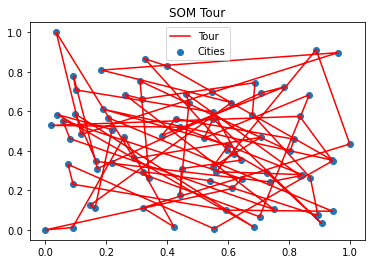

Cities Visited in Order:
['Kirikkale', 'Mus', 'Tekirdag', 'Bayburt', 'Antalya', 'Manisa', 'Denizli', 'Burdur', 'Bilecik', 'Bartin', 'Zonguldak', 'Igdir', 'Kilis', 'Mardin', 'Eskisehir', 'Bursa', 'Ankara', 'Sinop', 'Tokat', 'Rize', 'Edirne', 'Kastamonu', 'Kocaeli', 'Kirsehir', 'Aksaray', 'Gaziantep', 'Amasya', 'Usak', 'Mersin', 'Kahramanmaras', 'Siirt', 'Agri', 'Trabzon', 'Duzce', 'Tunceli', 'Erzincan', 'Erzurum', 'Sakarya', 'Hatay', 'Samsun', 'Sivas', 'Istanbul', 'Ardahan', 'Sanliurfa', 'Bolu', 'Mugla', 'Sirnak', 'Karabuk', 'Konya', 'Adiyaman', 'Diyarbakir', 'Van', 'Aydin', 'Yalova', 'Artvin', 'Giresun', 'Ordu', 'Bitlis', 'Osmaniye', 'Corum', 'Batman', 'Kutahya', 'Kayseri', 'Nevsehir', 'Karaman', 'Elazig', 'Malatya', 'Canakkale', 'Kirklareli', 'Isparta', 'Balikesir', 'Gumushane', 'Adana', 'Kars', 'Hakkari', 'Afyonkarahisar', 'Yozgat', 'Nigde', 'Bingol', 'Izmir', 'Cankiri']
Cost for M=81: 32.20


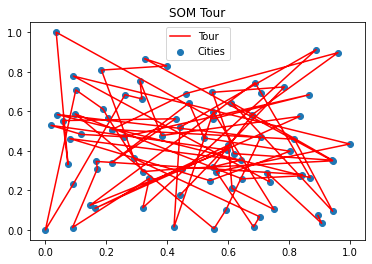

Cities Visited in Order:
['Tunceli', 'Ardahan', 'Rize', 'Burdur', 'Igdir', 'Kocaeli', 'Izmir', 'Mugla', 'Gaziantep', 'Trabzon', 'Edirne', 'Yalova', 'Eskisehir', 'Erzurum', 'Osmaniye', 'Diyarbakir', 'Sirnak', 'Bayburt', 'Duzce', 'Kirikkale', 'Bolu', 'Corum', 'Yozgat', 'Sinop', 'Antalya', 'Tekirdag', 'Karaman', 'Tokat', 'Adana', 'Bilecik', 'Kirsehir', 'Artvin', 'Istanbul', 'Aydin', 'Amasya', 'Bursa', 'Bingol', 'Afyonkarahisar', 'Mersin', 'Batman', 'Agri', 'Balikesir', 'Kahramanmaras', 'Sivas', 'Nevsehir', 'Konya', 'Malatya', 'Kirklareli', 'Gumushane', 'Elazig', 'Sakarya', 'Bitlis', 'Kutahya', 'Mardin', 'Aksaray', 'Kars', 'Sanliurfa', 'Karabuk', 'Giresun', 'Ordu', 'Nigde', 'Kayseri', 'Hatay', 'Kilis', 'Cankiri', 'Adiyaman', 'Erzincan', 'Hakkari', 'Bartin', 'Zonguldak', 'Kastamonu', 'Ankara', 'Mus', 'Usak', 'Isparta', 'Canakkale', 'Samsun', 'Siirt', 'Denizli', 'Manisa', 'Van']
Cost for M=162: 32.11


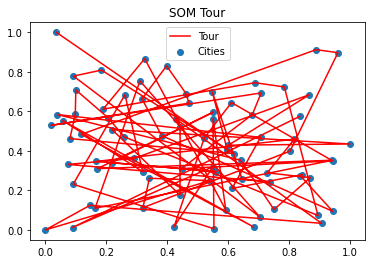

Cities Visited in Order:
['Sinop', 'Bilecik', 'Rize', 'Batman', 'Siirt', 'Yozgat', 'Ankara', 'Tekirdag', 'Mardin', 'Canakkale', 'Gaziantep', 'Tunceli', 'Gumushane', 'Bolu', 'Manisa', 'Kirsehir', 'Kayseri', 'Diyarbakir', 'Konya', 'Malatya', 'Sirnak', 'Edirne', 'Kirklareli', 'Tokat', 'Usak', 'Corum', 'Adiyaman', 'Ordu', 'Nigde', 'Afyonkarahisar', 'Antalya', 'Bingol', 'Bartin', 'Kilis', 'Artvin', 'Ardahan', 'Van', 'Karaman', 'Cankiri', 'Hatay', 'Mersin', 'Osmaniye', 'Burdur', 'Kastamonu', 'Samsun', 'Mus', 'Karabuk', 'Aksaray', 'Igdir', 'Sivas', 'Sakarya', 'Kirikkale', 'Isparta', 'Kahramanmaras', 'Mugla', 'Denizli', 'Aydin', 'Bitlis', 'Erzurum', 'Amasya', 'Bursa', 'Kutahya', 'Balikesir', 'Agri', 'Izmir', 'Sanliurfa', 'Giresun', 'Zonguldak', 'Trabzon', 'Duzce', 'Adana', 'Istanbul', 'Yalova', 'Erzincan', 'Hakkari', 'Kocaeli', 'Bayburt', 'Elazig', 'Eskisehir', 'Nevsehir', 'Kars']
Cost for M=243: 34.93


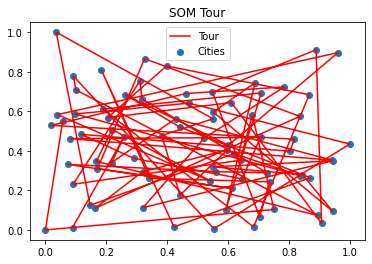

Cities Visited in Order:
['Nevsehir', 'Karaman', 'Kirikkale', 'Bolu', 'Igdir', 'Osmaniye', 'Bursa', 'Batman', 'Ankara', 'Tokat', 'Sirnak', 'Mugla', 'Adana', 'Trabzon', 'Ardahan', 'Bayburt', 'Malatya', 'Hakkari', 'Eskisehir', 'Balikesir', 'Izmir', 'Sakarya', 'Artvin', 'Bingol', 'Istanbul', 'Kilis', 'Usak', 'Tekirdag', 'Zonguldak', 'Cankiri', 'Kocaeli', 'Manisa', 'Kirklareli', 'Rize', 'Mus', 'Siirt', 'Konya', 'Kastamonu', 'Elazig', 'Aydin', 'Gumushane', 'Ordu', 'Mardin', 'Edirne', 'Amasya', 'Erzincan', 'Diyarbakir', 'Gaziantep', 'Kahramanmaras', 'Van', 'Hatay', 'Samsun', 'Afyonkarahisar', 'Canakkale', 'Duzce', 'Mersin', 'Agri', 'Burdur', 'Kirsehir', 'Sinop', 'Antalya', 'Sanliurfa', 'Tunceli', 'Bilecik', 'Adiyaman', 'Aksaray', 'Kars', 'Bartin', 'Sivas', 'Kutahya', 'Yozgat', 'Isparta', 'Denizli', 'Giresun', 'Karabuk', 'Nigde', 'Erzurum', 'Yalova', 'Bitlis', 'Kayseri', 'Corum']
Cost for M=405: 39.05


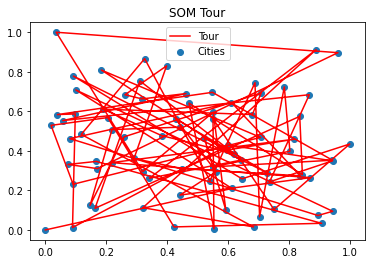

Cities Visited in Order:
['Gumushane', 'Gaziantep', 'Kirsehir', 'Karaman', 'Istanbul', 'Yalova', 'Kilis', 'Sanliurfa', 'Burdur', 'Karabuk', 'Aksaray', 'Kars', 'Balikesir', 'Duzce', 'Afyonkarahisar', 'Antalya', 'Bitlis', 'Canakkale', 'Batman', 'Samsun', 'Denizli', 'Bolu', 'Isparta', 'Tunceli', 'Aydin', 'Kirikkale', 'Mugla', 'Bilecik', 'Bayburt', 'Bingol', 'Sakarya', 'Adiyaman', 'Sinop', 'Edirne', 'Sivas', 'Yozgat', 'Kahramanmaras', 'Manisa', 'Elazig', 'Cankiri', 'Adana', 'Nigde', 'Bursa', 'Kastamonu', 'Erzurum', 'Konya', 'Kirklareli', 'Malatya', 'Usak', 'Tokat', 'Bartin', 'Diyarbakir', 'Artvin', 'Mus', 'Ardahan', 'Sirnak', 'Eskisehir', 'Igdir', 'Rize', 'Amasya', 'Mersin', 'Nevsehir', 'Mardin', 'Hakkari', 'Siirt', 'Tekirdag', 'Corum', 'Trabzon', 'Giresun', 'Ordu', 'Zonguldak', 'Ankara', 'Erzincan', 'Agri', 'Kocaeli', 'Osmaniye', 'Van', 'Izmir', 'Hatay', 'Kutahya', 'Kayseri']
Cost for M=567: 38.37


In [109]:
n = len(x_column)
M_values = [n, 2*n, 3*n, 5*81, 7*n]

for M in M_values:

    neurons_elastic_band = train_som_elastic_band(M, data,  lr_initial=0.3, sigma_initial=1.5)
    
    # Visualize the tour
    result_2 = visualize_tour(neurons_elastic_band, data)

    # Calculate and print the cost of the tour
    tour_cost_2 = calculate_tour_cost(result_2)
    print(f'Cost for M={M}: {tour_cost_2:.2f}')

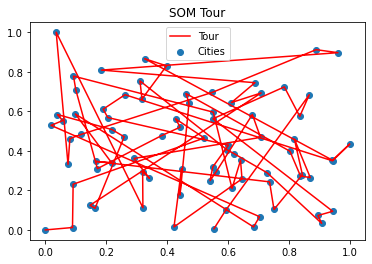

Cities Visited in Order:
['Afyonkarahisar', 'Bingol', 'Tekirdag', 'Kars', 'Ardahan', 'Antalya', 'Izmir', 'Van', 'Manisa', 'Denizli', 'Burdur', 'Bilecik', 'Karabuk', 'Giresun', 'Zonguldak', 'Bartin', 'Igdir', 'Canakkale', 'Hakkari', 'Ordu', 'Kilis', 'Cankiri', 'Mardin', 'Eskisehir', 'Diyarbakir', 'Isparta', 'Yalova', 'Bursa', 'Ankara', 'Konya', 'Adiyaman', 'Malatya', 'Sinop', 'Yozgat', 'Osmaniye', 'Tokat', 'Rize', 'Kirklareli', 'Edirne', 'Kastamonu', 'Artvin', 'Kocaeli', 'Istanbul', 'Kirsehir', 'Aksaray', 'Karaman', 'Gaziantep', 'Amasya', 'Corum', 'Adana', 'Mus', 'Usak', 'Mersin', 'Kirikkale', 'Kahramanmaras', 'Siirt', 'Bitlis', 'Balikesir', 'Mugla', 'Aydin', 'Agri', 'Sirnak', 'Trabzon', 'Duzce', 'Tunceli', 'Erzincan', 'Elazig', 'Batman', 'Erzurum', 'Kutahya', 'Sakarya', 'Samsun', 'Hatay', 'Sivas', 'Sanliurfa', 'Gumushane', 'Bolu', 'Bayburt', 'Nigde', 'Nevsehir', 'Kayseri']
Cost for M=81: 20.99


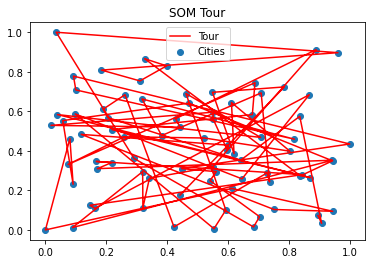

Cities Visited in Order:
['Tunceli', 'Ardahan', 'Rize', 'Burdur', 'Kocaeli', 'Sirnak', 'Bayburt', 'Karaman', 'Yozgat', 'Artvin', 'Yalova', 'Gaziantep', 'Aydin', 'Amasya', 'Bursa', 'Trabzon', 'Bingol', 'Afyonkarahisar', 'Mersin', 'Batman', 'Tekirdag', 'Aksaray', 'Kirsehir', 'Balikesir', 'Kahramanmaras', 'Kirikkale', 'Sivas', 'Igdir', 'Nevsehir', 'Adiyaman', 'Malatya', 'Konya', 'Eskisehir', 'Kirklareli', 'Bolu', 'Gumushane', 'Adana', 'Sakarya', 'Antalya', 'Bilecik', 'Mardin', 'Tokat', 'Bitlis', 'Izmir', 'Kutahya', 'Kayseri', 'Osmaniye', 'Nigde', 'Corum', 'Duzce', 'Hakkari', 'Agri', 'Bartin', 'Zonguldak', 'Karabuk', 'Kastamonu', 'Edirne', 'Sinop', 'Ankara', 'Usak', 'Mus', 'Diyarbakir', 'Isparta', 'Erzincan', 'Canakkale', 'Samsun', 'Hatay', 'Mugla', 'Giresun', 'Sanliurfa', 'Istanbul', 'Siirt', 'Denizli', 'Elazig', 'Ordu', 'Kilis', 'Cankiri', 'Erzurum', 'Kars', 'Manisa', 'Van']
Cost for M=162: 32.28


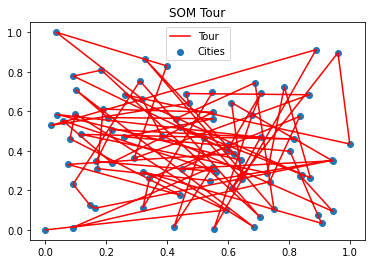

Cities Visited in Order:
['Kayseri', 'Bingol', 'Adiyaman', 'Manisa', 'Van', 'Sirnak', 'Karaman', 'Antalya', 'Cankiri', 'Hatay', 'Usak', 'Mersin', 'Osmaniye', 'Tunceli', 'Yozgat', 'Burdur', 'Samsun', 'Kastamonu', 'Mus', 'Karabuk', 'Nigde', 'Kirsehir', 'Aksaray', 'Igdir', 'Diyarbakir', 'Sivas', 'Kilis', 'Sakarya', 'Kirikkale', 'Corum', 'Isparta', 'Kahramanmaras', 'Gaziantep', 'Mugla', 'Tokat', 'Denizli', 'Ardahan', 'Aydin', 'Gumushane', 'Bolu', 'Artvin', 'Bitlis', 'Bartin', 'Erzurum', 'Amasya', 'Bursa', 'Kutahya', 'Edirne', 'Canakkale', 'Ordu', 'Balikesir', 'Agri', 'Izmir', 'Sanliurfa', 'Giresun', 'Sinop', 'Zonguldak', 'Ankara', 'Tekirdag', 'Trabzon', 'Duzce', 'Adana', 'Kirklareli', 'Afyonkarahisar', 'Yalova', 'Istanbul', 'Bilecik', 'Mardin', 'Erzincan', 'Hakkari', 'Kocaeli', 'Batman', 'Bayburt', 'Elazig', 'Eskisehir', 'Nevsehir', 'Siirt', 'Kars', 'Konya', 'Malatya', 'Rize']
Cost for M=243: 36.45


In [111]:
n = len(x_column)
M_values = [n, 2*n, 3*n]

for M in M_values:

    neurons_elastic_band = train_som_elastic_band(M, data,  lr_initial=0.5, sigma_initial=4)
    
    # Visualize the tour
    result_2 = visualize_tour(neurons_elastic_band, data)

    # Calculate and print the cost of the tour
    tour_cost_2 = calculate_tour_cost(result_2)
    print(f'Cost for M={M}: {tour_cost_2:.2f}')

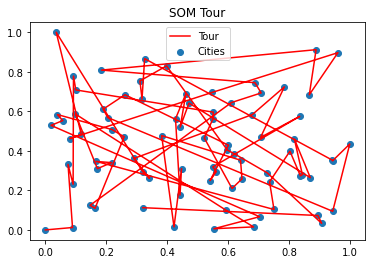

Cities Visited in Order:
['Malatya', 'Van', 'Manisa', 'Denizli', 'Burdur', 'Bilecik', 'Zonguldak', 'Karabuk', 'Giresun', 'Bartin', 'Igdir', 'Hakkari', 'Canakkale', 'Izmir', 'Cankiri', 'Kilis', 'Ordu', 'Mardin', 'Diyarbakir', 'Isparta', 'Eskisehir', 'Kars', 'Bursa', 'Ardahan', 'Yalova', 'Ankara', 'Konya', 'Adiyaman', 'Sinop', 'Tokat', 'Osmaniye', 'Rize', 'Edirne', 'Tekirdag', 'Kirklareli', 'Kastamonu', 'Artvin', 'Istanbul', 'Kocaeli', 'Kirsehir', 'Aksaray', 'Karaman', 'Gaziantep', 'Amasya', 'Corum', 'Adana', 'Mus', 'Afyonkarahisar', 'Usak', 'Bingol', 'Mersin', 'Sivas', 'Kirikkale', 'Kahramanmaras', 'Bitlis', 'Siirt', 'Sirnak', 'Agri', 'Balikesir', 'Mugla', 'Aydin', 'Duzce', 'Gumushane', 'Trabzon', 'Bolu', 'Tunceli', 'Erzincan', 'Elazig', 'Sanliurfa', 'Erzurum', 'Batman', 'Kutahya', 'Bayburt', 'Antalya', 'Sakarya', 'Hatay', 'Samsun', 'Nigde', 'Yozgat', 'Nevsehir', 'Kayseri']
Cost for M=81: 20.62


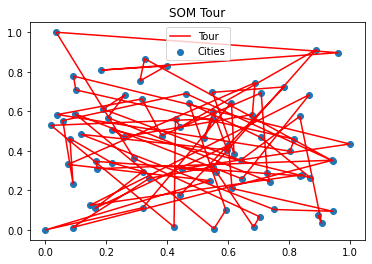

Cities Visited in Order:
['Tunceli', 'Ardahan', 'Rize', 'Burdur', 'Kocaeli', 'Malatya', 'Kayseri', 'Diyarbakir', 'Yozgat', 'Artvin', 'Yalova', 'Karaman', 'Gaziantep', 'Aydin', 'Bursa', 'Duzce', 'Bingol', 'Afyonkarahisar', 'Mersin', 'Batman', 'Tekirdag', 'Kirsehir', 'Balikesir', 'Agri', 'Kahramanmaras', 'Sivas', 'Igdir', 'Nevsehir', 'Konya', 'Eskisehir', 'Kirklareli', 'Gumushane', 'Bolu', 'Elazig', 'Adana', 'Antalya', 'Bayburt', 'Sakarya', 'Bilecik', 'Tokat', 'Bitlis', 'Izmir', 'Kutahya', 'Mardin', 'Aksaray', 'Adiyaman', 'Kirikkale', 'Osmaniye', 'Nigde', 'Corum', 'Trabzon', 'Hakkari', 'Bartin', 'Karabuk', 'Zonguldak', 'Kastamonu', 'Edirne', 'Sinop', 'Ankara', 'Mus', 'Usak', 'Isparta', 'Erzincan', 'Canakkale', 'Samsun', 'Hatay', 'Mugla', 'Sirnak', 'Amasya', 'Giresun', 'Sanliurfa', 'Istanbul', 'Denizli', 'Siirt', 'Cankiri', 'Ordu', 'Kilis', 'Erzurum', 'Kars', 'Manisa', 'Van']
Cost for M=162: 32.80


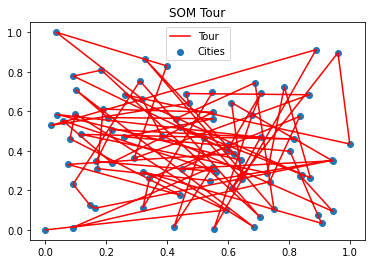

Cities Visited in Order:
['Kayseri', 'Bingol', 'Adiyaman', 'Manisa', 'Van', 'Sirnak', 'Karaman', 'Antalya', 'Cankiri', 'Hatay', 'Usak', 'Mersin', 'Osmaniye', 'Tunceli', 'Yozgat', 'Burdur', 'Samsun', 'Kastamonu', 'Mus', 'Karabuk', 'Nigde', 'Kirsehir', 'Aksaray', 'Igdir', 'Diyarbakir', 'Sivas', 'Kilis', 'Sakarya', 'Kirikkale', 'Corum', 'Isparta', 'Kahramanmaras', 'Gaziantep', 'Mugla', 'Tokat', 'Denizli', 'Ardahan', 'Aydin', 'Gumushane', 'Bolu', 'Artvin', 'Bitlis', 'Bartin', 'Erzurum', 'Amasya', 'Bursa', 'Kutahya', 'Edirne', 'Canakkale', 'Ordu', 'Balikesir', 'Agri', 'Izmir', 'Sanliurfa', 'Giresun', 'Sinop', 'Zonguldak', 'Ankara', 'Tekirdag', 'Trabzon', 'Duzce', 'Adana', 'Kirklareli', 'Afyonkarahisar', 'Yalova', 'Istanbul', 'Bilecik', 'Mardin', 'Erzincan', 'Hakkari', 'Kocaeli', 'Batman', 'Bayburt', 'Elazig', 'Eskisehir', 'Nevsehir', 'Siirt', 'Kars', 'Konya', 'Malatya', 'Rize']
Cost for M=243: 36.45


In [116]:
n = len(x_column)
M_values = [n, 2*n, 3*n]

for M in M_values:

    neurons_elastic_band = train_som_elastic_band(M, data,  lr_initial=0.8, sigma_initial=3.5)
    
    # Visualize the tour
    result_2 = visualize_tour(neurons_elastic_band, data)

    # Calculate and print the cost of the tour
    tour_cost_2 = calculate_tour_cost(result_2)
    print(f'Cost for M={M}: {tour_cost_2:.2f}')